Edited by LI Jie.  2019.9.24

## Q3 

In [1]:
#Assignment1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x =  pd.DataFrame({'name':['Abel','Bob','Carl','Dale','Eric','Felix','George','Howard','Igor'],'height':[180, 183,176,168,174,170,180,179,175],
                   'weight':[73,75,70,60,65,59,78,80,75],'eye-color':['hazel','brown','hazel','brown','brown','brown','blue','hazel','blue'],
                   'hair-color':['black','brown','blond','black','brown','blond','black','brown','blond']},index=[1,2,3,4,5,6,7,8,9])
x

,name,height,weight,eye-color,hair-color
1,Abel,180,73,hazel,black
2,Bob,183,75,brown,brown
3,Carl,176,70,hazel,blond
4,Dale,168,60,brown,black
5,Eric,174,65,brown,brown
6,Felix,170,59,brown,blond
7,George,180,78,blue,black
8,Howard,179,80,hazel,brown
9,Igor,175,75,blue,blond


### (a)  boxplots

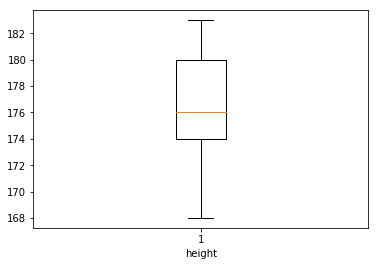

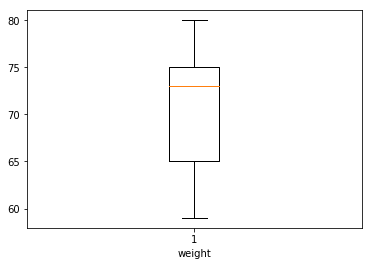

In [12]:
plt.figure(0)
plt.xlabel('height')
plt.boxplot(x['height']);
plt.savefig('height_1')

plt.figure(1)
plt.xlabel('weight')
plt.boxplot(x['weight']);
plt.savefig('weight_1')

### (b)  bar charts & histograms

In [13]:
# count the number for every name
[list(x['name']).count(i) for i in x['name']]

[1, 1, 1, 1, 1, 1, 1, 1, 1]

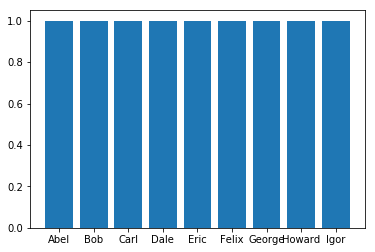

In [14]:
plt.bar(x['name'], [list(x['name']).count(i) for i in x['name']])
plt.savefig('name-bar')

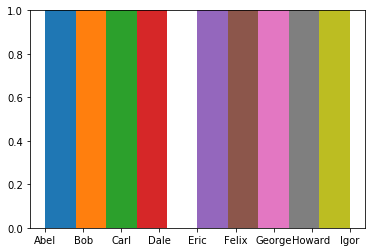

In [48]:
plt.hist(x['name'],stacked=True);
plt.savefig('name-hist')

In [58]:
set(x['eye-color'])
[list(x['eye-color']).count(i) for i in set(x['eye-color'])]

[2, 4, 3]

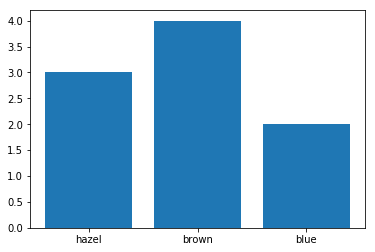

In [60]:
plt.bar(x['eye-color'],[list(x['eye-color']).count(i) for i in x['eye-color']])
plt.savefig('eye-color-bar')

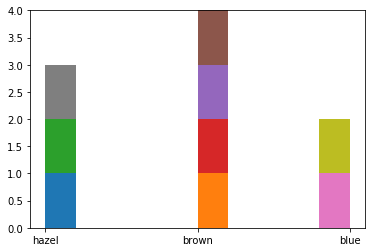

In [43]:
plt.hist(x['eye-color'],stacked=True);
plt.savefig('eye-color-hist')

In [15]:
[list(x['hair-color']).count(i) for i in x['hair-color']]

[3, 3, 3, 3, 3, 3, 3, 3, 3]

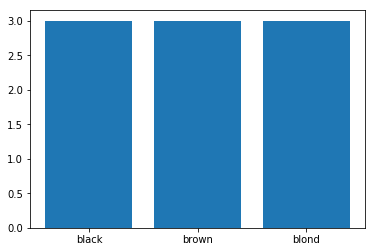

In [45]:
plt.bar(x['hair-color'],[list(x['hair-color']).count(i) for i in x['hair-color']])
plt.savefig('hair-color-bar')

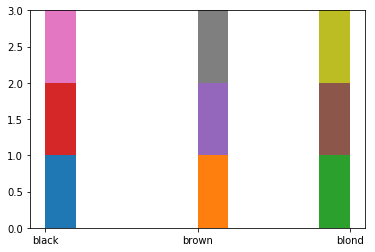

In [16]:
plt.hist(x['hair-color'],histtype='bar',stacked=True);
plt.savefig('hair-color-hist')

### (c)  Compute the correlation coefficient（相关系数） to see whether these two attributes are correlated.

**Pearson相关系数**  

取值范围为[-1,1]，当值为负时，为负相关，当值为正时，为正相关，绝对值越大，则正/负相关的程度越大。
若数据无重复值，且两个变量完全单调相关时，spearman相关系数为+1或-1。
当两个变量独立时相关系数为0，但反之不成立
    
方法一： 公式计算

cov_xy=E[(X-E(X))(Y-E(Y))]= E(XY) - E(X)E(Y)  

pearson_co = cov_xy / (std_x * std_y)   

方法二： 调库求解


In [18]:
#Scipy的pearsonr方法能够同时计算相关系数和p-value

import numpy as np
from scipy.stats import pearsonr

print(pearsonr(x['height'], x['weight']))

(0.8607050490579244, 0.0028905620453297735)


因此height和weight相关系数为0.8607050490579244,具有强相关性。

### (d)  

1.covariance matrix:
        
方法一： 公式计算

  
方法二： 调库求解


In [19]:
# numpy.cov() 求协方差矩阵

print(np.cov(x['height'], x['weight']))

[[24.36111111 32.43055556]
 [32.43055556 58.27777778]]


2. eigenvector

方法一： 公式计算

A为n阶矩阵，若数λ和n维非0列向量x满足Ax=λx，那么数λ称为A的特征值，x称为A的对应于特征值λ的特征向量。式Ax=λx也可写成( A-λE)x=0，并且|λE-A|叫做A 的特征多项式。

  
方法二： 调库求解  


In [34]:
covmat=np.cov(x['height'], x['weight'])

In [36]:
# 官方文档链接：http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html
from numpy import linalg
eigenvalue,eigenvector=np.linalg.eig(covmat)
eigenvector

array([[-0.85538965, -0.51798508],
       [ 0.51798508, -0.85538965]])

The required eigenvector is [0.5180 0.8554].

  3. The projection with regard to the center, 

In [42]:
#reduce to 1 dimension
center= eigenvector[:,1]
# for Abel
abel = x.loc[1,['height','weight']]
abel1=abs(np.dot(center,abel))

# for Dale
dale = x.loc[4,['height','weight']]
dale1 =abs( np.dot(center,dale))
# for Igor
igor = x.loc[9,['height','weight']]
igor1=abs( np.dot(center,igor))

print("the projection for Abel is {}, for Dale is {} and for Igor is {}".format(abel1,dale1,igor1))

the projection for Abel is 155.6807589313631, for Dale is 138.34487249639074 and for Igor is 154.80161283878363


### (e)  卡方分布(chi-square distribution, χ2-distribution)

χ2 用于衡量实际值与理论值的差异程度（也就是卡方检验的核心思想），包含了以下两个信息：
1. 实际值与理论值偏差的绝对大小（由于平方的存在，差异是被放大的）
2. 差异程度与理论值的相对大小

方法一： 公式计算

自由度= (行数 - 1) * (列数 - 1)

χ2 =∑ ((A−E)^2 / E)   
A:实际值  
E：期望值、理论值
  
方法二： 调库求解  


In [46]:
from  scipy.stats import chi2_contingency
import numpy as np

#返回值为 
#卡方检验值chisq-statistic, p-value, 自由度df  ，期望频率expected_frep
kf = chi2_contingency([[1,1,0],[1,1,2],[1,1,1]])
kf

(1.5, 0.8266414672967757, 4, array([[0.66666667, 0.66666667, 0.66666667],
        [1.33333333, 1.33333333, 1.33333333],
        [1.        , 1.        , 1.        ]]))

得到 chisq-statistic=1.5, p-value=0.8266, df=4  expected_frep  
结论: 因为p值=0.8266>0.1, 故接受原假设